In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [63]:
n = 1000000
beta = 0.01
phi = 0.99
sigma = 0.1
ro = -0.8

np.random.seed(1234)

e = np.random.randn(n)
u = np.random.randn(n)

h = np.zeros(n)
r = np.zeros(n)
for t in range(1, n):
    h[t] = phi * h[t-1] + ro * sigma * e[t-1] + sigma * np.sqrt(1 - ro ** 2) * u[t]
    r[t] = beta * np.exp(1/2 * h[t]) * e[t]

h = h[10000:]
r = r[10000:]

<h3>Subquestion 1</h3>

Mean of r: -6.248878898428165e-06
Standard deviation of r: 0.011373360299390676


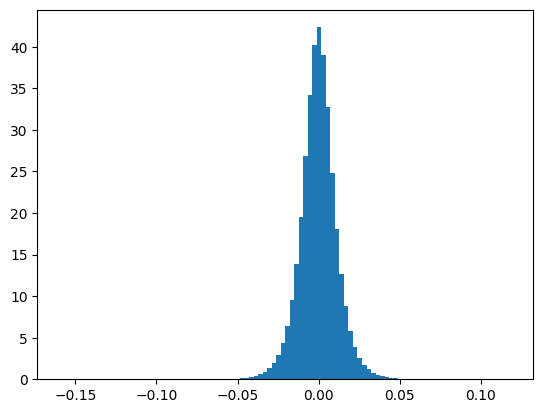

In [64]:
print(f'Mean of r: {r.mean()}')
print(f'Standard deviation of r: {r.std()}')

# plt.plot(r);
plt.hist(r, bins=100, density=True);

<h3>Subquestion 2</h3>

In [65]:
horizons = [1, 20, 250]
cumrets = {  }
for horizon in horizons:
    cumret = np.zeros(n - 10000 - horizon)
    for t in range(n - 10000 - horizon):
        cumret[t] = r[t:(t+horizon)].sum()
    cumrets[horizon] = {
        'horizon': horizon,
        'cumret': cumret,
        'skewness': skew(cumret),
        'kurtosis': kurtosis(cumret)
    }

cumrets

{1: {'horizon': 1,
  'cumret': array([ 0.01355651,  0.00570614,  0.01168441, ...,  0.0046264 ,
          0.00465214, -0.0063584 ]),
  'skewness': 0.006180878907821241,
  'kurtosis': 2.0249767694923477},
 20: {'horizon': 20,
  'cumret': array([ 0.11137839,  0.07589696,  0.06898182, ..., -0.00030497,
          0.00263038, -0.00445009]),
  'skewness': -0.5706942403154468,
  'kurtosis': 2.1660397296299285},
 250: {'horizon': 250,
  'cumret': array([-0.18494894, -0.19380699, -0.19559035, ...,  0.20800351,
          0.2252299 ,  0.22380778]),
  'skewness': -1.0354934992820966,
  'kurtosis': 2.4477830315396423}}

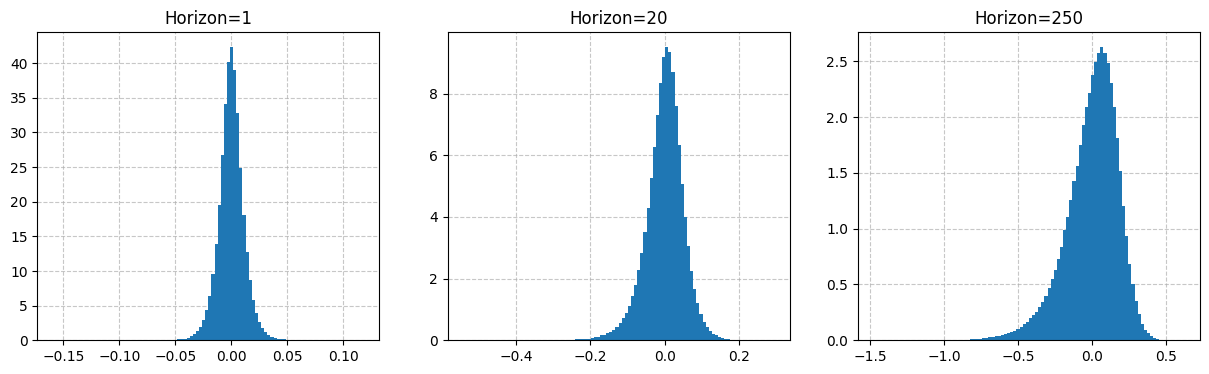

In [66]:
fig, axis = plt.subplots(1, 3, figsize=(15, 4))
for cumret, ax in zip(cumrets.values(), axis):
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.hist(cumret['cumret'], bins=100, density=True);
    ax.set_title(f'Horizon={cumret["horizon"]}')

<h3>Subquestion 3</h3>

In [67]:
thresholds = [ 0.05, 0.01 ]
VaR = np.empty((len(thresholds), len(horizons)))
for i, threshold in enumerate(thresholds):
    for j, horizon in enumerate(horizons):
        VaR[i, j] = np.quantile(cumrets[horizon]['cumret'], threshold)


pd.DataFrame(VaR, columns=horizons, index=thresholds)

,1,20,250
0.05,-0.018329,-0.087239,-0.328173
0.01,-0.029609,-0.147045,-0.552624


<h3>Subquestion 5</h3>

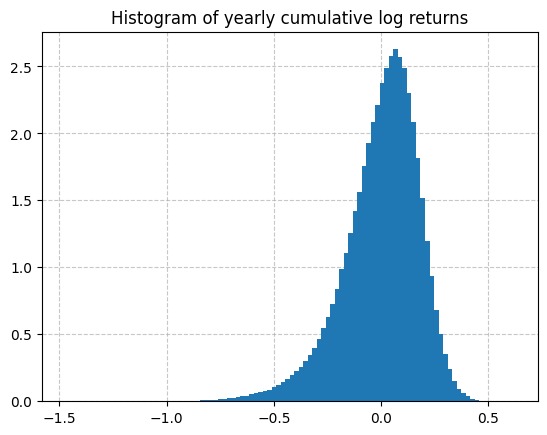

In [68]:
plt.hist(cumrets[250]['cumret'], density=True, bins=100)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.title('Histogram of yearly cumulative log returns');